In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [41]:
df = pd.read_csv("closet_data_v1.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수
0,배색 가디건 네이비,봄가을,2021,상의,온라인,보세,1,네이비,3,무난,일상,1,5,5,3,4.333333
1,배색 가디건 하늘,봄가을,2021,상의,오프라인,보세,1,스카이블루,3,무난,일상,1,3,4,4,3.666667
2,줄무늬 티셔츠,봄가을,2014,상의,오프라인,보세,0,네이비,1,무난,일상,1,4,5,4,4.333333
3,파란색 크롭 셔츠,봄가을,2023,상의,온라인,SPA,0,스카이블루,4,유행,일상,1,4,4,4,4.000000
4,숏 트렌치 코트,봄가을,2023,겉옷,오프라인,브랜드,1,베이지,16,유행,일상,1,3,4,3,3.333333


In [42]:
df.shape

(150, 16)

In [43]:
df.describe()

,구매 년도,구매 전 착용 여부,가격,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2020.786667,0.426667,4.980000,0.700000,2.646667,3.500000,3.506667,3.217778
std,1.770704,0.496250,3.551103,0.459793,1.351791,1.133682,0.917735,0.947532
min,2014.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2020.000000,0.000000,3.000000,0.000000,1.000000,3.000000,3.000000,2.666667
50%,2021.000000,0.000000,4.000000,1.000000,3.000000,3.000000,3.000000,3.333333
75%,2022.000000,1.000000,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000
max,2023.000000,1.000000,20.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [44]:
df.describe(include="object")

,제품명,계절,카테고리,구매처,브랜드여부,색상,유행 여부,구매 목적
count,150,150,150,150,150,150,150,150
unique,150,3,5,2,3,18,3,7
top,배색 가디건 네이비,봄가을,상의,오프라인,보세,블랙,무난,일상
freq,1,64,82,115,81,30,113,80


array([[<AxesSubplot:title={'center':'구매 년도'}>,
        <AxesSubplot:title={'center':'구매 전 착용 여부'}>,
        <AxesSubplot:title={'center':'가격'}>],
       [<AxesSubplot:title={'center':'최근 1년 내 착용 여부'}>,
        <AxesSubplot:title={'center':'착용 빈도'}>,
        <AxesSubplot:title={'center':'만족도'}>],
       [<AxesSubplot:title={'center':'주변 평가'}>,
        <AxesSubplot:title={'center':'성공점수'}>, <AxesSubplot:>]],
      dtype=object)

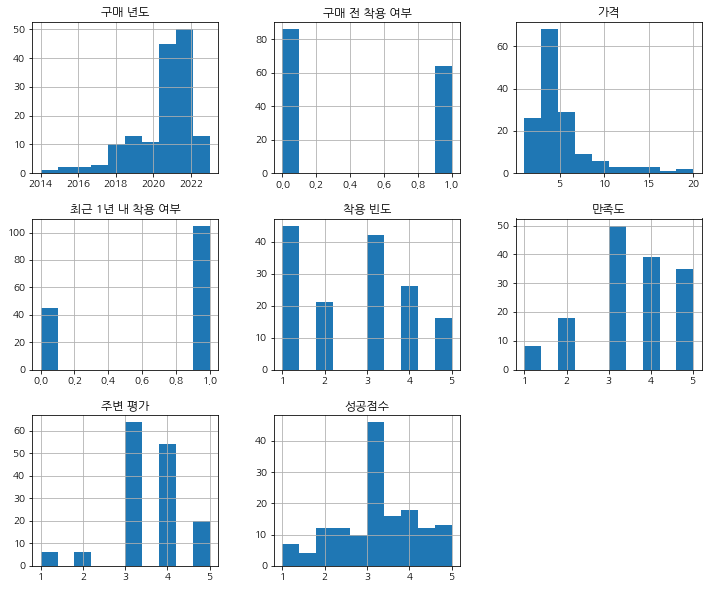

In [45]:
df.hist(bins=10, figsize=(12,10))

In [46]:
df["색상"].unique()

array(['네이비', '스카이블루', '베이지', '데님', '아이보리', '차콜', '블랙', '그레이', '퍼플',
       '화이트', '브라운', '그린', '핑크', '블루', '옐로우', '민트', '레드', '카키'],
      dtype=object)

In [47]:
df.nunique()

제품명              150
계절                 3
구매 년도             10
카테고리               5
구매처                2
브랜드여부             3
구매 전 착용 여부         2
색상                18
가격                18
유행 여부              3
구매 목적              7
최근 1년 내 착용 여부      2
착용 빈도              5
만족도                5
주변 평가              5
성공점수              13
dtype: int64

<AxesSubplot:>

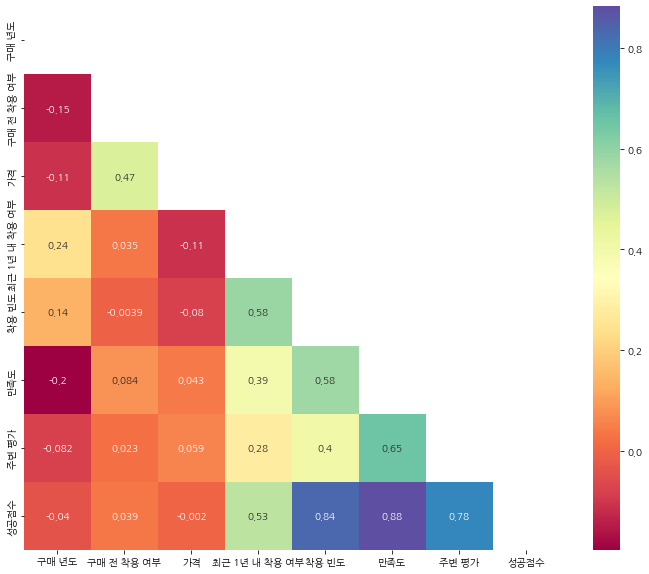

In [63]:
df_cor = df.corr()
mask = np.triu(np.ones_like(df_cor))
plt.figure(figsize=(12,10)) #그래프 사이즈 조절
sns.heatmap(df_cor, cmap="Spectral", annot = True, mask=mask)

<AxesSubplot:xlabel='색상', ylabel='count'>

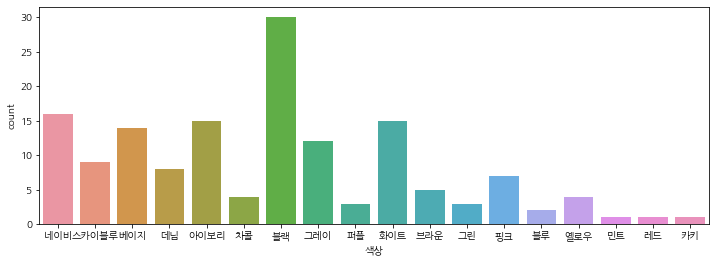

In [70]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x="색상")

In [ ]:
# 색상, 브랜드여부, 구매처, 등에 따른 상관관계 분석은 어떻게 하지...


In [ ]:
#옷의 RFM구하기 -> 최근에 입었다면 +1 , 자주입는 옷이라면 +1, 비싼 옷이라면 +1(ㅋ)
